# Parameter h

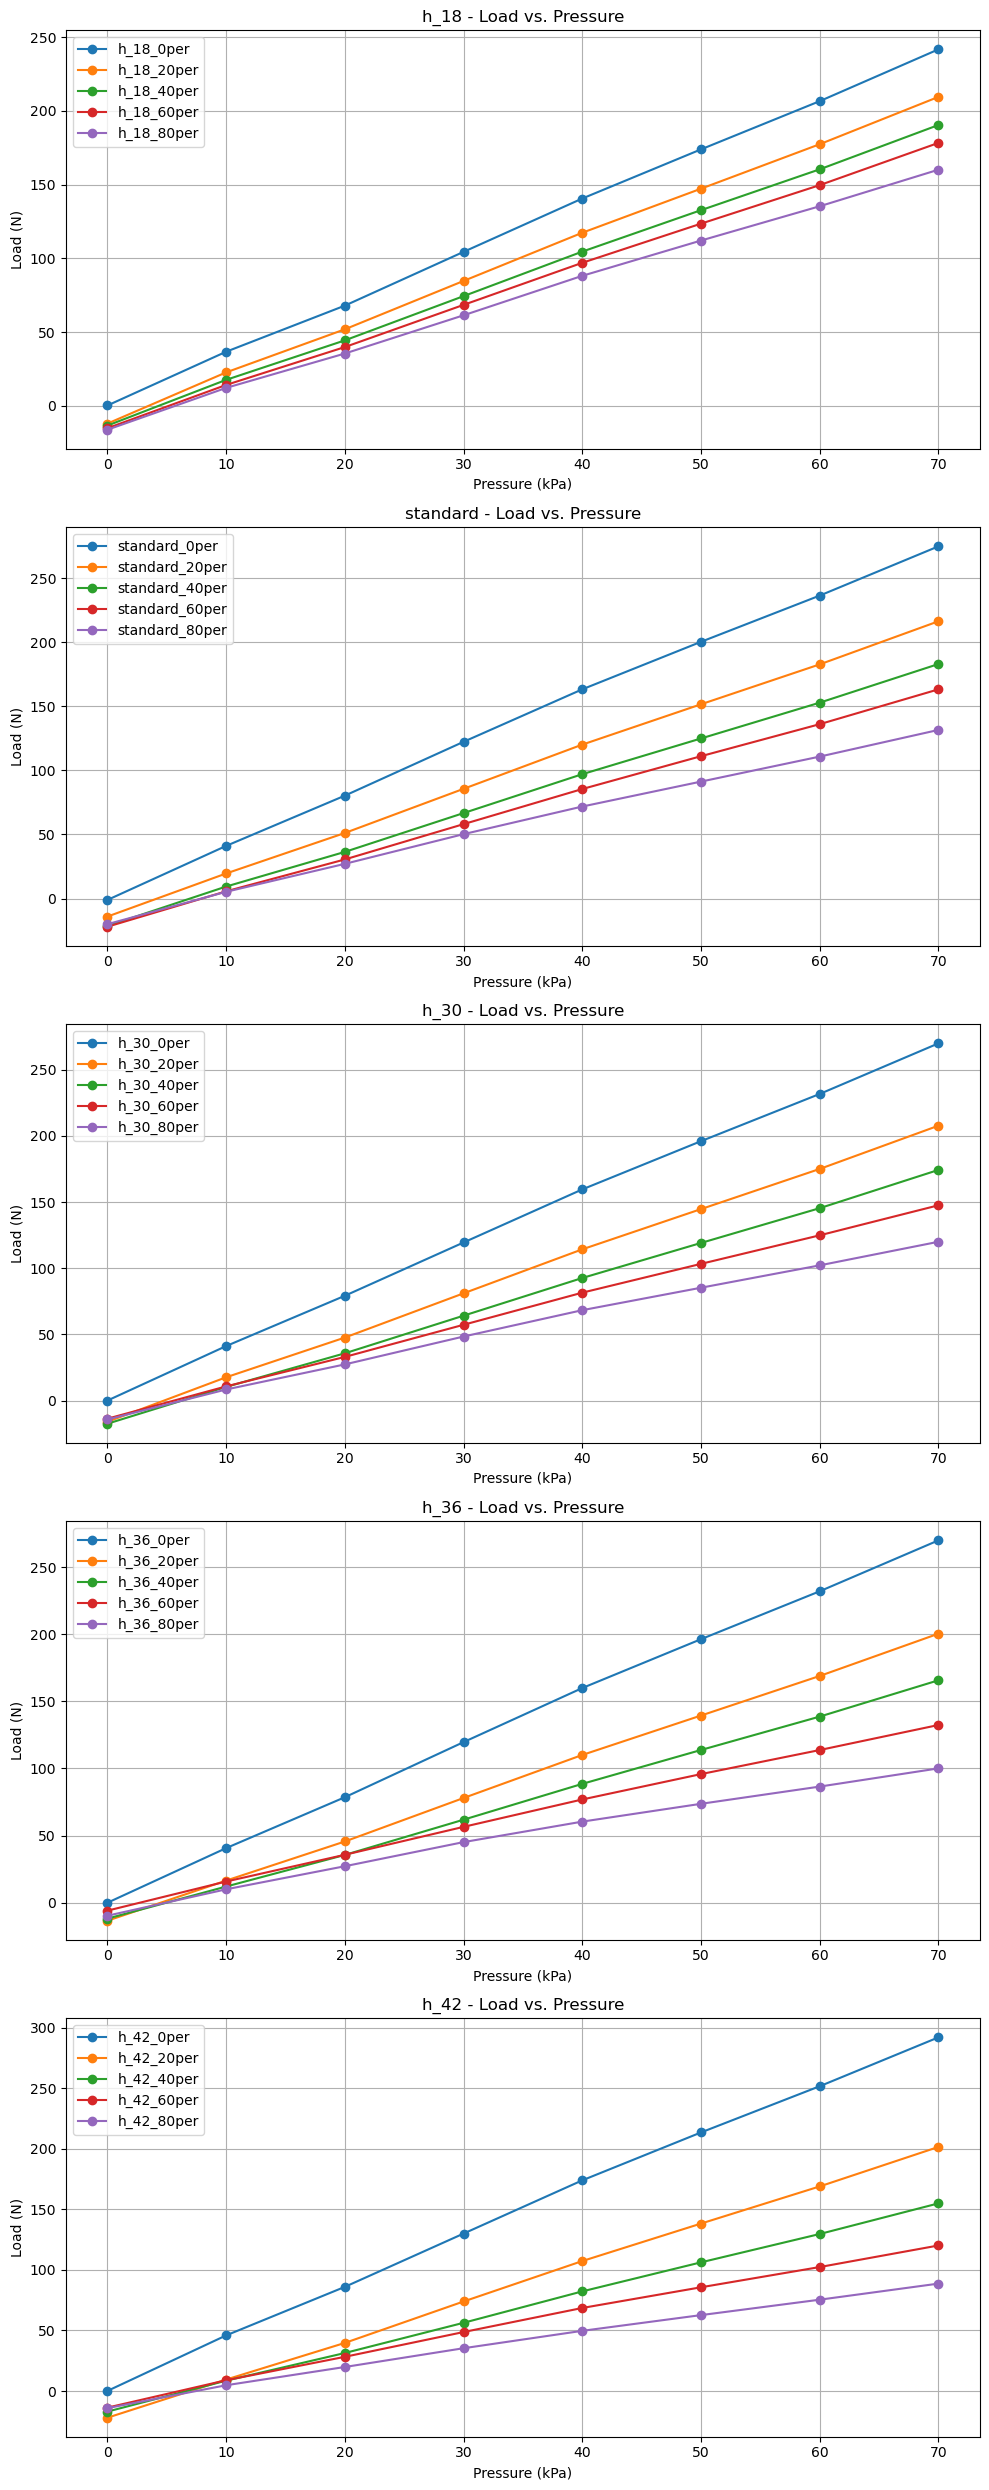

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 폴더 경로 설정 (실제 경로로 수정해 주세요.)
folder_path = r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test_under_air_pressure'

# 서브플롯의 개수 설정 (prefix에 따른 개수)
num_plots = 5

# 서브플롯 생성
fig, axs = plt.subplots(num_plots, 1, figsize=(10, 5 * num_plots))

# 다양한 파일 패턴에 대해 반복합니다.
prefixes = ['h_18','standard', 'h_30', 'h_36', 'h_42']
for ax, prefix in zip(axs, prefixes):
    for i in [0, 20, 40, 60, 80]:
        # 파일 경로 설정
        file_path = os.path.join(folder_path, f'{prefix}_{i}per.csv')

        # CSV 파일을 데이터프레임으로 로드합니다.
        data = pd.read_csv(file_path)
        data['LoadDiff'] = data['Load'].diff().fillna(0)

        # 절댓값이 5보다 큰 'LoadDiff' 값의 인덱스를 찾습니다.
        large_diff_indices = data[abs(data['LoadDiff']) > 3].index.tolist()

        # 각 구간별로 'Load' 데이터의 평균을 계산합니다.
        load_averages = []
        start_idx = 0

        for end_idx in large_diff_indices:
            # 구간별 평균 계산
            load_average = data['Load'][start_idx:end_idx].mean()
            load_averages.append(load_average)
            start_idx = end_idx + 1  # 다음 구간을 위해 시작 인덱스를 조정합니다.

        # NaN 값 제거
        load_averages = [x for x in load_averages if pd.notna(x)]

        # 리스트를 데이터프레임으로 변환하고 'Pressure' 열을 추가합니다.
        load_averages_df = pd.DataFrame(load_averages, columns=['LoadAverage'])
        load_averages_df = load_averages_df.drop(1).reset_index(drop=True)
        if(i == 20 and prefix =='h_42'):
            load_averages_df = load_averages_df.drop(3).reset_index(drop=True)
        load_averages_df['Pressure'] = load_averages_df.index * 10

        # 각 데이터프레임에 대해 서브플롯에 그래프를 그립니다.
        ax.plot(load_averages_df['Pressure'], load_averages_df['LoadAverage'], marker='o', label=f'{prefix}_{i}per')

    # 서브플롯의 제목과 축 레이블을 설정합니다.
    ax.set_title(f'{prefix} - Load vs. Pressure')
    ax.set_xlabel('Pressure (kPa)')
    ax.set_ylabel('Load (N)')
    ax.legend()  # 범례를 표시합니다.
    ax.grid(True)  # 그리드를 추가합니다.

# 전체 그래프의 레이아웃을 조정합니다.
ax.grid(True, which='both', axis='x')
plt.tight_layout()
plt.show()


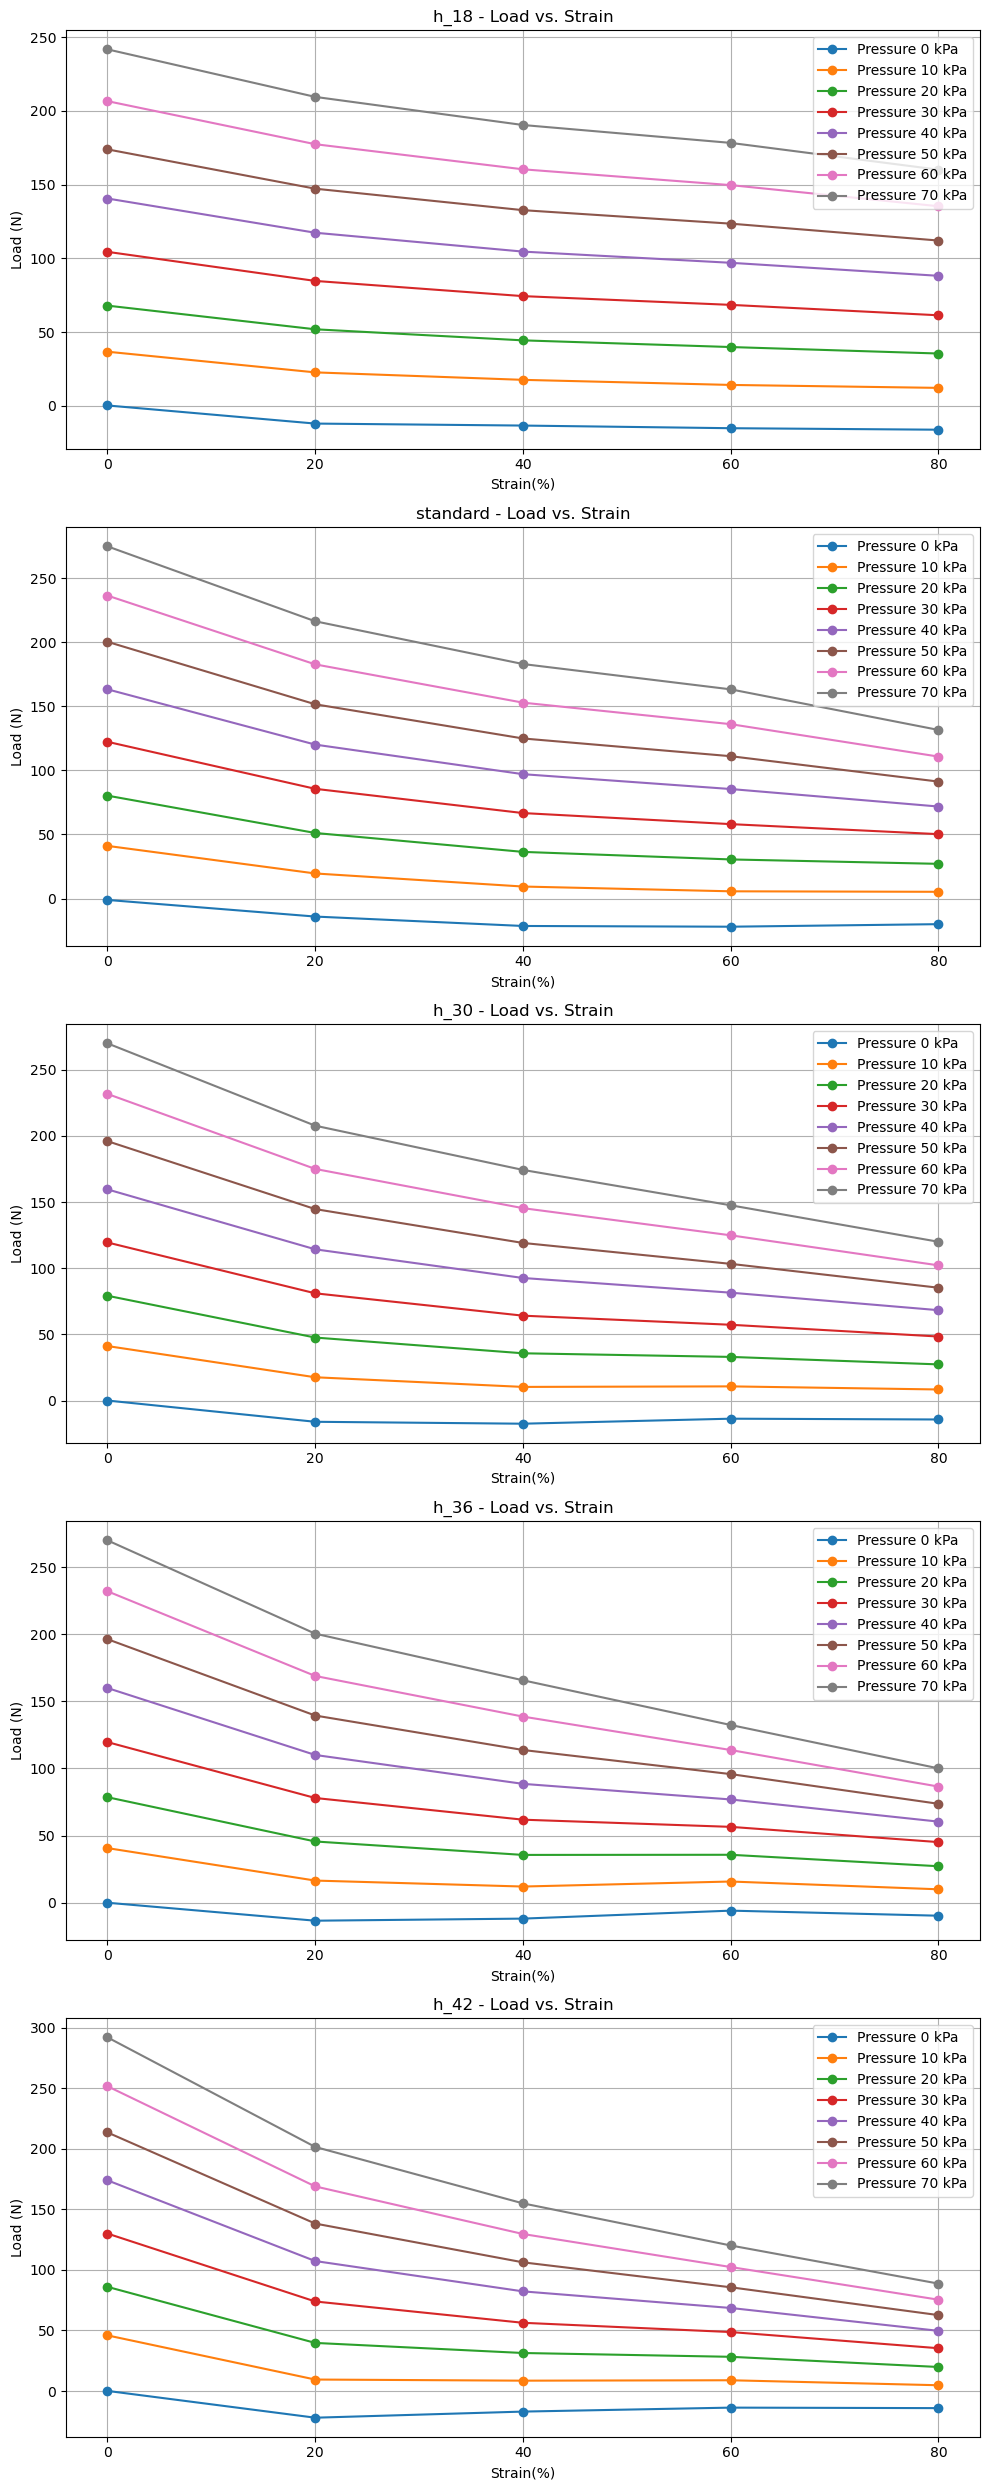

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 폴더 경로 설정
folder_path = r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test_under_air_pressure'

# 서브플롯 생성
fig, axs = plt.subplots(5, 1, figsize=(10, 25))

# 다양한 파일 패턴에 대해 반복합니다.
prefixes = ['h_18','standard', 'h_30', 'h_36', 'h_42']
file_series = [0, 20, 40, 60, 80]  # 파일 시리즈

# 각 prefix에 대한 데이터를 저장할 딕셔너리
data_dict = {prefix: [] for prefix in prefixes}

# 각 prefix와 파일 시리즈에 대한 데이터 프레임 생성
for prefix in prefixes:
    for i in file_series:
        # 파일 경로 설정
        file_path = os.path.join(folder_path, f'{prefix}_{i}per.csv')

        # CSV 파일을 데이터프레임으로 로드합니다.
        data = pd.read_csv(file_path)
        data['LoadDiff'] = data['Load'].diff().fillna(0)

        # 절댓값이 3보다 큰 'LoadDiff' 값의 인덱스를 찾습니다.
        large_diff_indices = data[abs(data['LoadDiff']) > 3].index.tolist()

        # 각 구간별로 'Load' 데이터의 평균을 계산합니다.
        load_averages = []
        start_idx = 0
        for end_idx in large_diff_indices:
            # 구간별 평균 계산
            load_average = data['Load'][start_idx:end_idx].mean()
            load_averages.append(load_average)
            start_idx = end_idx + 1  # 다음 구간을 위해 시작 인덱스를 조정합니다.

        # NaN 값 제거
        load_averages = [x for x in load_averages if pd.notna(x)]

        # 리스트를 데이터프레임으로 변환하고 'Pressure' 열을 추가합니다.
        load_averages_df = pd.DataFrame(load_averages, columns=['LoadAverage'])
        load_averages_df = load_averages_df.drop(1).reset_index(drop=True)
        if (i == 20 and prefix == 'h_42'):
            load_averages_df = load_averages_df.drop(3).reset_index(drop=True)
        load_averages_df['Pressure'] = load_averages_df.index * 10

        # 데이터 프레임을 딕셔너리에 추가합니다.
        data_dict[prefix].append(load_averages_df)

# 각 prefix에 대해 서브플롯에 그래프를 그립니다.
for ax, prefix in zip(axs, prefixes):
    for pressure in range(0, 71, 10):  # 0부터 70까지 10 단위로 압력
        load_values = []
        
        for df in data_dict[prefix]:
            # 해당 압력에 대한 'LoadAverage' 값 선택
            load_at_pressure = df[df['Pressure'] == pressure]['LoadAverage'].mean()
            load_values.append(load_at_pressure)
        
        # 서브플롯에 데이터 플롯
        ax.plot(file_series, load_values, marker='o', label=f'Pressure {pressure} kPa')

    ax.set_title(f'{prefix} - Load vs. Strain')
    ax.set_xlabel('Strain(%)')
    ax.set_ylabel('Load (N)')
    ax.legend()
    ax.grid(True)
    ax.set_xticks(file_series)

plt.tight_layout()
plt.show()


# Parameter n

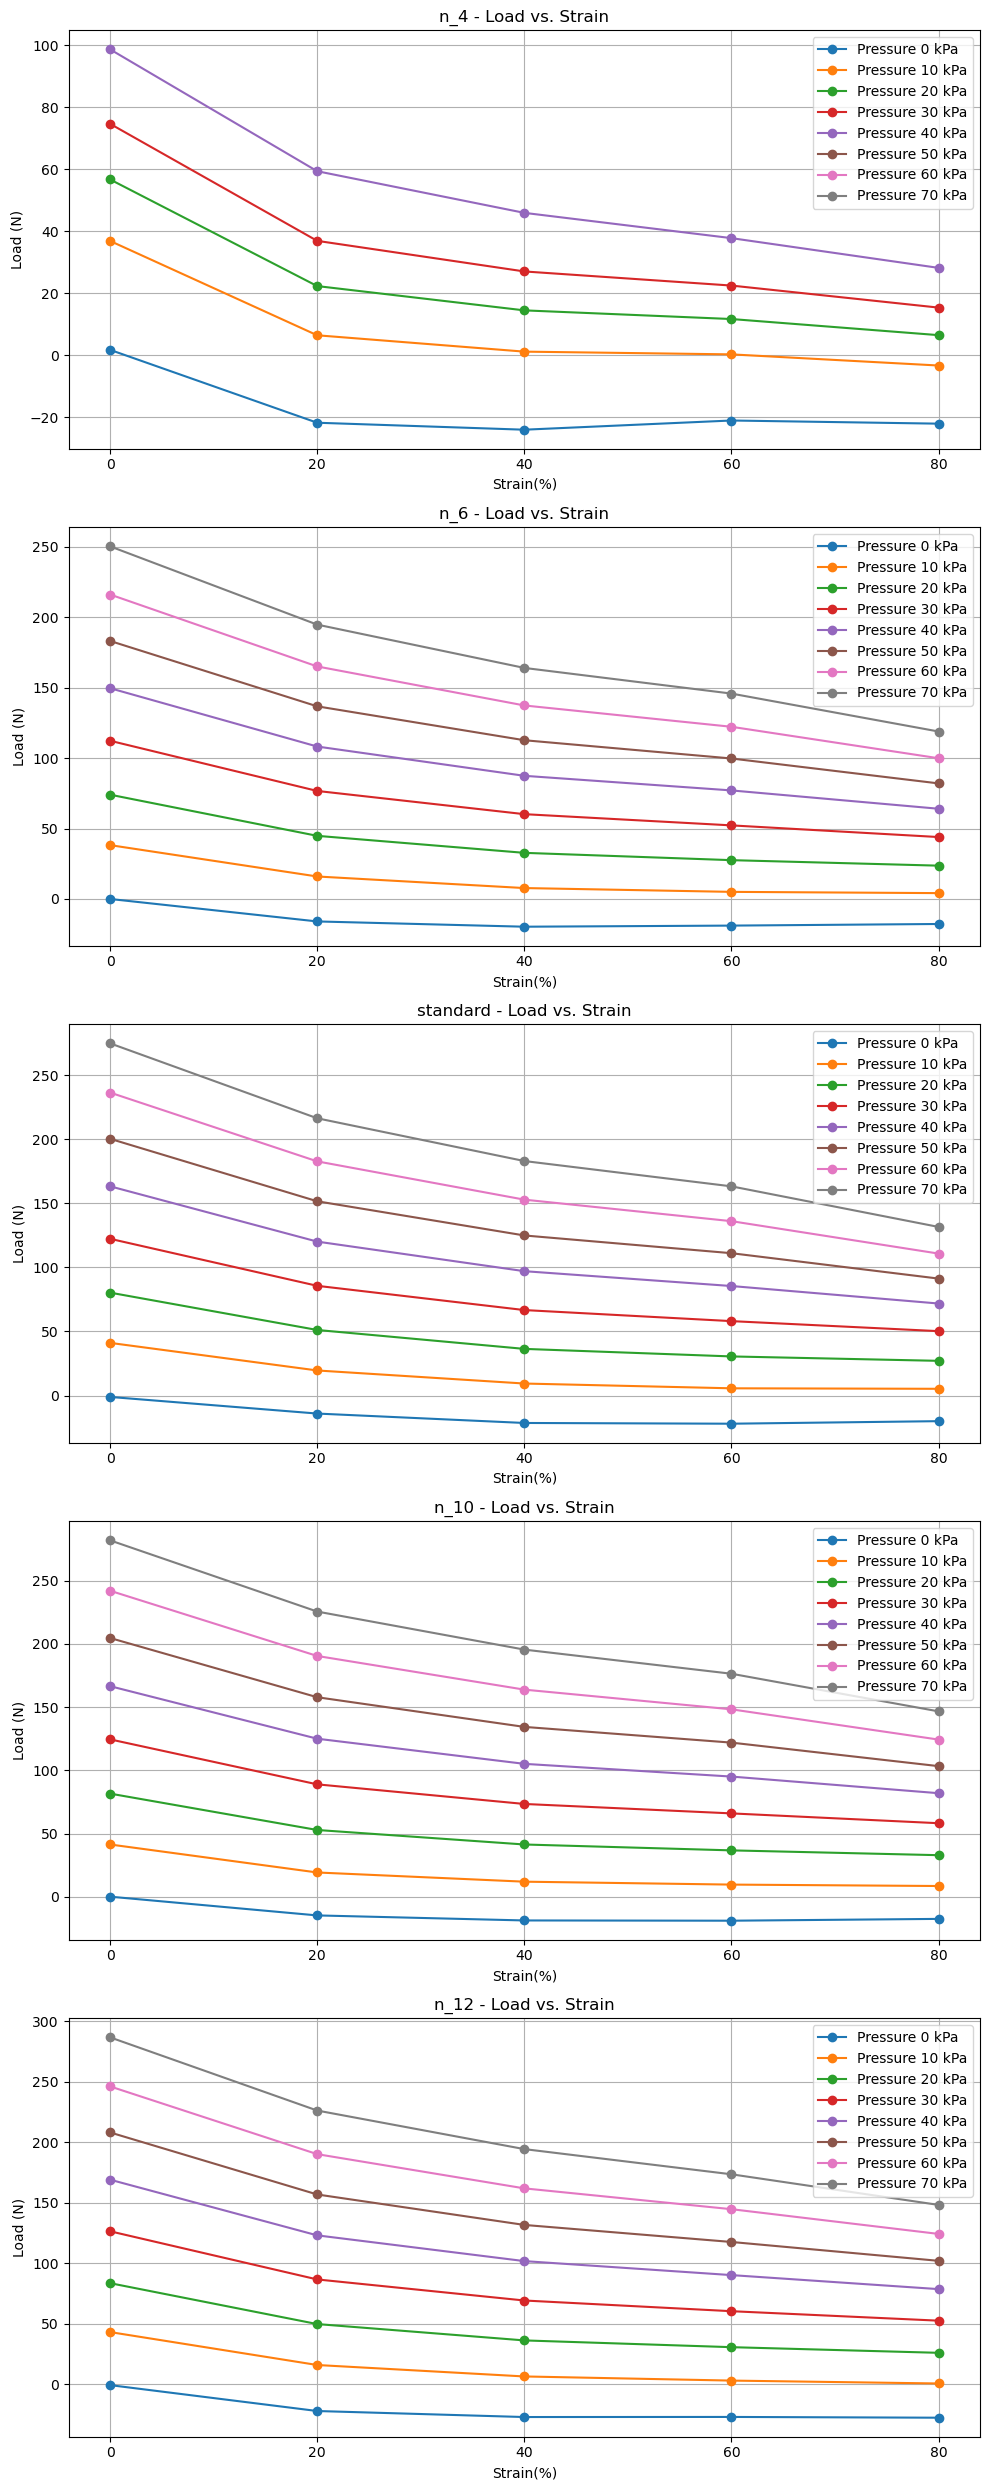

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 폴더 경로 설정
folder_path = r'C:\Users\jsw\Documents\GitHub\OV-PAM_model\Compression_test_under_air_pressure'

# 서브플롯 생성
fig, axs = plt.subplots(5, 1, figsize=(10, 25))

# 다양한 파일 패턴에 대해 반복합니다.
prefixes = ['n_4', 'n_6', 'standard', 'n_10', 'n_12']
file_series = [0, 20, 40, 60, 80]  # 파일 시리즈

# 각 prefix에 대한 데이터를 저장할 딕셔너리
data_dict = {prefix: [] for prefix in prefixes}

# 각 prefix와 파일 시리즈에 대한 데이터 프레임 생성
for prefix in prefixes:
    for i in file_series:
        # 파일 경로 설정
        file_path = os.path.join(folder_path, f'{prefix}_{i}per.csv')

        # CSV 파일을 데이터프레임으로 로드합니다.
        data = pd.read_csv(file_path)
        data['LoadDiff'] = data['Load'].diff().fillna(0)

        # 절댓값이 3보다 큰 'LoadDiff' 값의 인덱스를 찾습니다.
        large_diff_indices = data[abs(data['LoadDiff']) > 3].index.tolist()

        # 각 구간별로 'Load' 데이터의 평균을 계산합니다.
        load_averages = []
        start_idx = 0
        for end_idx in large_diff_indices:
            # 구간별 평균 계산
            load_average = data['Load'][start_idx:end_idx].mean()
            load_averages.append(load_average)
            start_idx = end_idx + 1  # 다음 구간을 위해 시작 인덱스를 조정합니다.

        # NaN 값 제거
        load_averages = [x for x in load_averages if pd.notna(x)]

        # 리스트를 데이터프레임으로 변환하고 'Pressure' 열을 추가합니다.
        load_averages_df = pd.DataFrame(load_averages, columns=['LoadAverage'])
        load_averages_df = load_averages_df.drop(1).reset_index(drop=True)
        if (i == 20 and prefix == 'h_42'):
            load_averages_df = load_averages_df.drop(3).reset_index(drop=True)
        load_averages_df['Pressure'] = load_averages_df.index * 10

        # 데이터 프레임을 딕셔너리에 추가합니다.
        data_dict[prefix].append(load_averages_df)

# 각 prefix에 대해 서브플롯에 그래프를 그립니다.
for ax, prefix in zip(axs, prefixes):
    for pressure in range(0, 71, 10):  # 0부터 70까지 10 단위로 압력
        load_values = []
        
        for df in data_dict[prefix]:
            # 해당 압력에 대한 'LoadAverage' 값 선택
            load_at_pressure = df[df['Pressure'] == pressure]['LoadAverage'].mean()
            load_values.append(load_at_pressure)
        
        # 서브플롯에 데이터 플롯
        ax.plot(file_series, load_values, marker='o', label=f'Pressure {pressure} kPa')

    ax.set_title(f'{prefix} - Load vs. Strain')
    ax.set_xlabel('Strain(%)')
    ax.set_ylabel('Load (N)')
    ax.legend()
    ax.grid(True)
    ax.set_xticks(file_series)

plt.tight_layout()
plt.show()
